In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

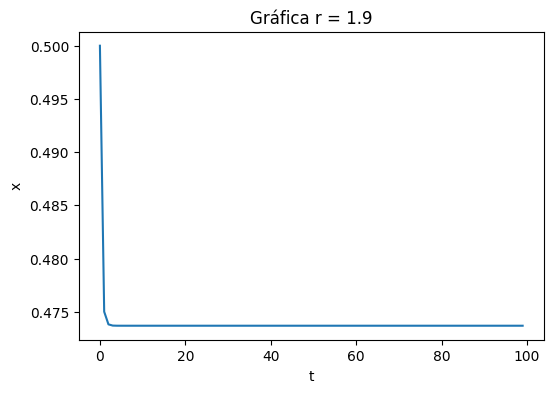

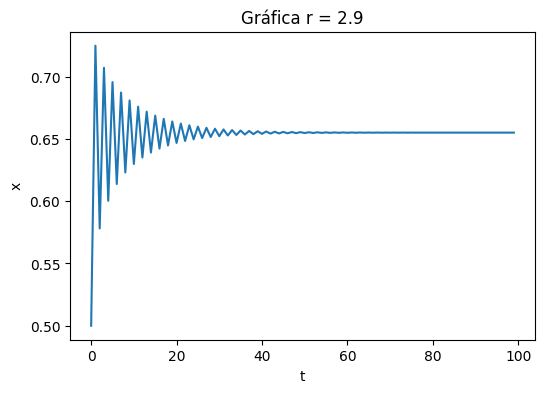

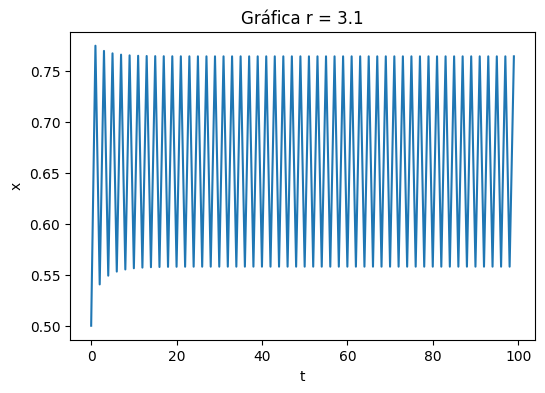

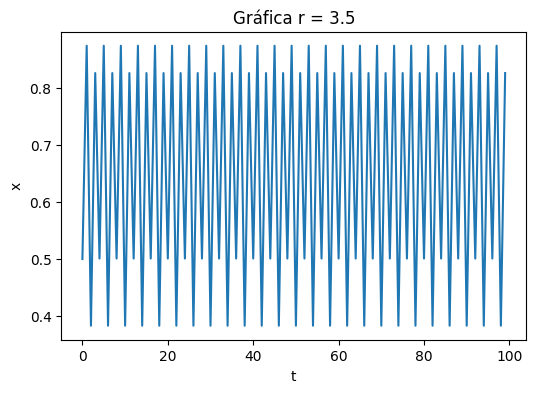

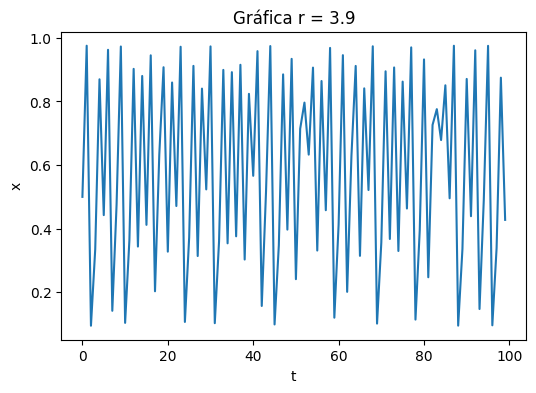

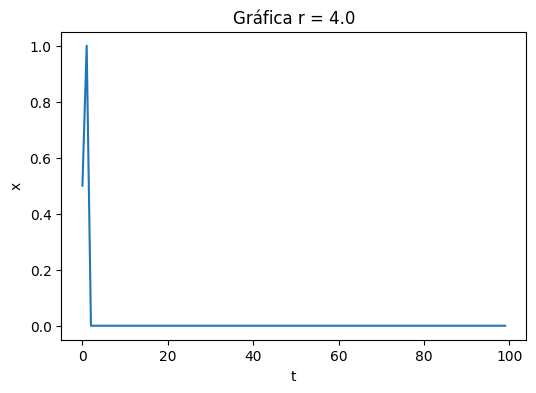

In [ ]:
# Valor inicial de x
x_0 = 0.5

# Lista de valores de r que se utilizarán en la simulación
r = [1.9, 2.9, 3.1, 3.5, 3.9, 4.0]

# Número de iteraciones de tiempo (tiempo de simulación)
t = 100

# Crear un array vacío 'x' para almacenar las iteraciones del mapa logístico
x = np.zeros(t)

# Asignar el valor inicial 'x_0' al primer elemento de 'x'
x[0] = x_0

# Bucle externo para iterar a través de los diferentes valores de 'r'
for j in range(0, len(r)):
    # Bucle interno para calcular las iteraciones del mapa logístico para un valor específico de 'r'
    for i in range(0, t - 1):
        # Cálculo del mapa logístico para la siguiente iteración
        x[i + 1] = (r[j] * x[i] * (1 - x[i]))

    # Crear una figura para mostrar la gráfica
    plt.figure(figsize=(6, 4))

    # Graficar 'x' en función de 't'
    plt.plot(x)

    # Configurar el título de la gráfica con el valor actual de 'r'
    plt.title(f'Gráfica r = {r[j]}')

    # Etiquetas de ejes
    plt.ylabel("x")
    plt.xlabel("t")


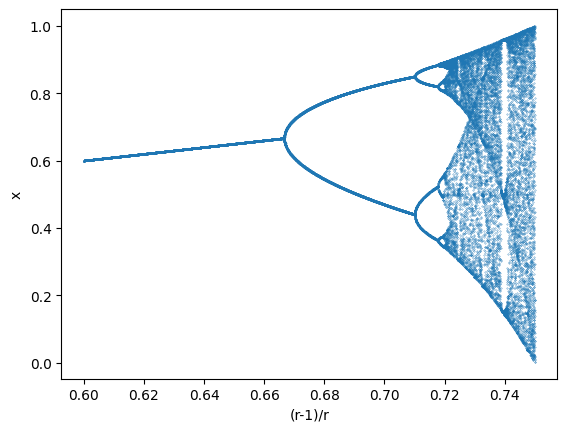

In [ ]:
# Definición de la función logist_map para calcular una iteración del mapa logístico
def logist_map(r, xi, N):
    x = np.zeros(N)
    x[0] = xi
    for i in range(0, N - 1):
        x[i + 1] = (r * x[i] * (1 - x[i]))
    return x[-1]

# Número de puntos a generar en la gráfica
Np = 50000

# Array para almacenar los resultados del mapa logístico
xf = np.zeros(Np)

# Valores de r que se utilizarán
r = np.linspace(2.5, 4, Np)

# Bucle principal: Iteración a través de los valores de r
for i in range(0, Np):
    # Generar una condición inicial aleatoria
    xini = np.random.random()

    # Calcular el valor final del mapa logístico con 1000 iteraciones
    x_i = logist_map(r=r[i], xi=xini, N=1000)

    # Almacenar el resultado en el array xf
    xf[i] = x_i

# Crear la gráfica
plt.plot((r - 1) / r, xf, ".", ms=0.5)
plt.xlabel("(r-1)/r")
plt.ylabel("x")
plt.show()


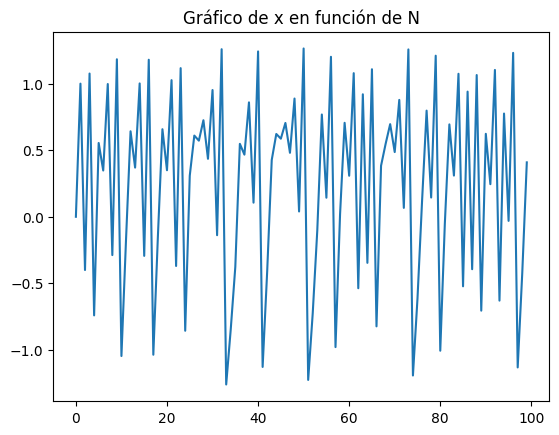

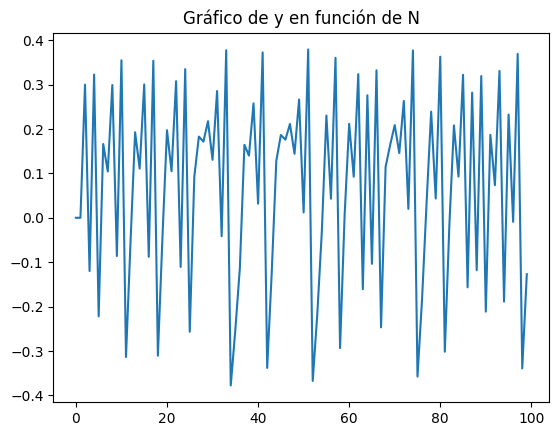

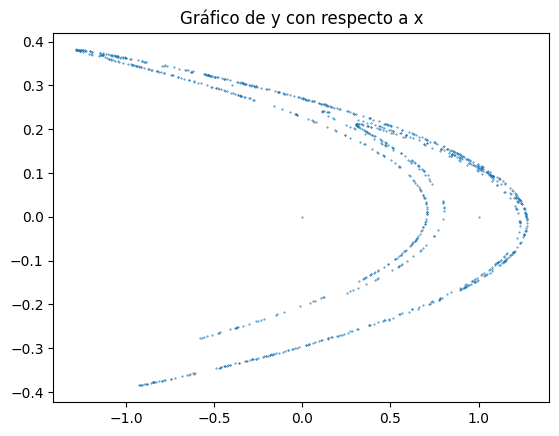

In [ ]:
# Definir las condiciones iniciales
x_0 = 0
y_0 = 0

# Definir los parámetros a y b
a = 1.4
b = 0.3

# Número de iteraciones
t = 1000

# Crear arreglos para almacenar las secuencias x e y
x = np.zeros(t)
x[0] = x_0

y = np.zeros(t)
y[0] = y_0

# Calcular las secuencias x e y usando un bucle
for i in range(0, t - 1):
  x[i + 1] = 1 - a*x[i]**2 + y[i]
  y[i + 1] = b*x[i]

# Crear la primera gráfica: Evolución de x en función de N
plt.figure(1)
plt.plot(x[0:100])
plt.title('Gráfico de x en función de N')

# Crear la segunda gráfica: Evolución de y en función de N
plt.figure(2)
plt.plot(y[0:100])
plt.title('Gráfico de y en función de N')

# Crear la tercera gráfica: Relación entre y y x
plt.figure(3)
plt.plot(x, y, ".", ms = 0.8)
plt.title('Gráfico de y con respecto a x')

# Mostrar las gráficas
plt.show()

El mínimo esta en x =  -0.0


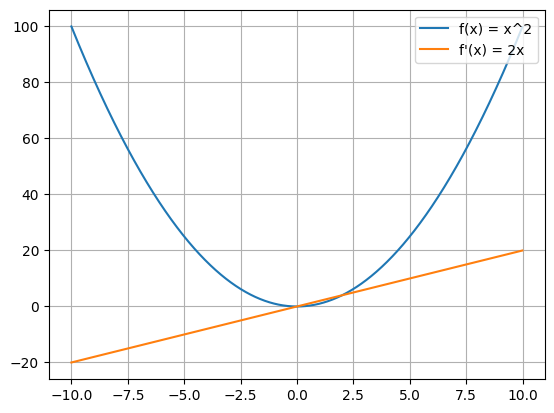

In [41]:
# Definir la variable simbólica
x = sp.symbols('x')

# Definir la función lambda
f = lambda x: x**2

# Convertir la función lambda en una expresión simbólica
expr = sp.sympify(f(x))

# Calcular la derivada
derivada = sp.diff(expr, x)

# Convertir la derivada en una función numérica
df = sp.lambdify(x, derivada, 'numpy')

# Inicializar el valor inicial de w de manera aleatoria
w_0 = np.random.randint(-10, 10)

# Crear una lista para almacenar los valores de w
w = [w_0]

# Definir la tasa de aprendizaje
a = 0.01

# Definir el valor de epsilon
eps = 10e-7

# Inicializar el contador i
i = 0

# Realizar el bucle mientras la derivada sea mayor que eps
while abs(df(w[i])) > eps:
    w.append(w[i] - a * df(w[i]))
    i += 1

# Imprimir el valor final de w
print("El mínimo esta en x = ", round(w[-1], 3))

# Crear un rango de valores para xx
xx = np.arange(-10, 10, 0.01)

# Graficar la función f(x) y su derivada f'(x)
plt.plot(xx, f(xx), label="f(x) = x^2")
plt.plot(xx, df(xx), label="f'(x) = 2x")
plt.legend(loc='upper right')

# Mostrar la gráfica
plt.grid(True)
plt.show()

Valor final de w para alpha = 0.1: 0.0
Valor final de w para alpha = 0.01: -0.0


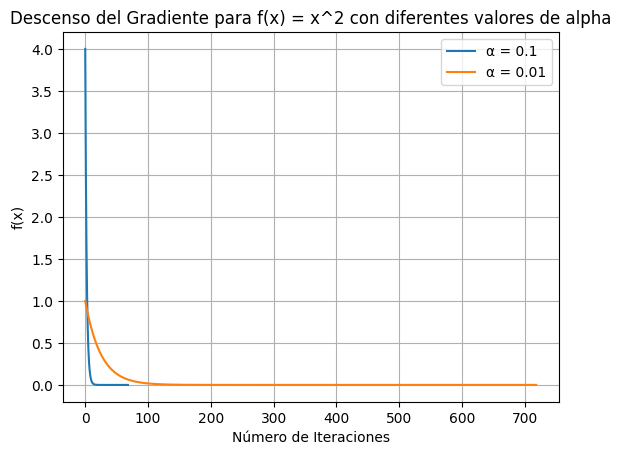

In [40]:
# Definir la variable simbólica
x = sp.symbols('x')

# Definir la función lambda
f = lambda x: x**2

# Convertir la función lambda en una expresión simbólica
expr = sp.sympify(f(x))

# Calcular la derivada
derivada = sp.diff(expr, x)

# Convertir la derivada en una función numérica
df = sp.lambdify(x, derivada, 'numpy')

# Valores de alpha (constante de aprendizaje)
alphas = [0.1, 0.01]

# Realizar el descenso del gradiente para cada alpha
for alpha in alphas:
    w_0 = np.random.randint(-10, 10)
    w = [w_0]
    eps = 10e-7
    i = 0
    fx_values = []  # Lista para almacenar los valores de f(x) en cada iteración

    while abs(df(w[i])) > eps:
        fx_values.append(f(w[i]))  # Registrar el valor actual de f(x)
        w.append(w[i] - alpha * df(w[i]))
        i += 1

    # Imprimir el valor final de w para cada alpha
    print(f"Valor final de w para alpha = {alpha}: {round(w[-1], 3)}")

    # Graficar la función f(x) en función del número de iteraciones
    plt.plot(range(len(fx_values)), fx_values, label=f'α = {alpha}')

# Configurar el gráfico
plt.title('Descenso del Gradiente para f(x) = x^2 con diferentes valores de alpha')
plt.xlabel('Número de Iteraciones')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()